## **Notebook PC1_Ativ1**
## Regularized Linear Classifier for the MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Caio Francisco Garcia de Lima **RA:** 195210


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  X.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11501568/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (60000, 784)
Shape of yt:  (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


**a) Apresente o número de amostras por classe para os conjuntos de treinamento e de teste.**

Foram utilizadas os seguintes valores de amostras para treinamento e teste

#### Treinamento
<table>
  <tr><th>Classe</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th><th>10</th></tr>
  
  <tr><th>Valores</th><td>5923.</td><td>6742.</td><td>5958.</td><td>6131.</td><td>5842.</td><td>5421.</td><td>5918.</td><td>6265.</td><td>5851.</td><td>5949.</td></tr>
</table>

#### Teste
<table>
  <tr><th>Classe</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th><th>10</th></tr>
  
  <tr><th>Valores</th><td>980.</td><td>1135.</td><td>1032.</td><td>1010.</td><td>982.</td><td>892.</td><td>958.</td><td>1028.</td><td>974.</td><td>1009.</td></tr>
</table>


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

X_training:          (42000, 784)
y_training:          (42000, 10)
X_validation:        (18000, 784)
y_validation:        (18000, 10)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_ 

In [ ]:
def get_w(X, y, c): 
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w


In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []
    
    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)
        
        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
c_values = [pow(2,d) for d in range(-22, 40, 2)]

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

2.384185791015625e-07
9.5367431640625e-07
3.814697265625e-06
1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

2.384185791015625e-07
9.5367431640625e-07
3.814697265625e-06
1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944


Best c value: 1024 
Performance of this value: 0.849


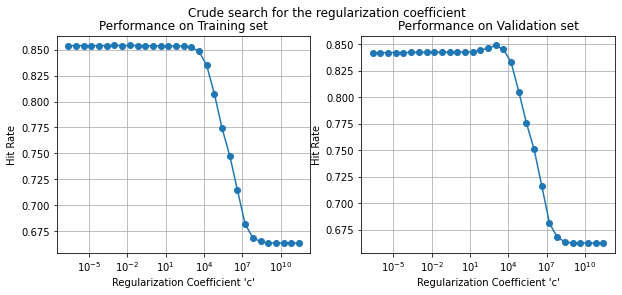

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))



**b) Confira se o intervalo de excursão da busca está adequado. Justifique sua resposta. Caso não esteja, faça modificações pertinentes até encontrar um bom intervalo de busca.**

R: Não estava adequado, pois em uma busca unidirecional devemos garantir que todos os casos foram verificados. Para se adequar o intervalo de busca foi expandido, garantindo que todos os casos fossem abordados.

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(X_training, y_training, fine_c_values)

256.0
640.0
1024.0
1408.0
1792.0
2176.0
2560.0
2944.0
3328.0
3712.0
4096.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(X_validation, y_validation, fine_c_values, Ws_fine)

256.0
640.0
1024.0
1408.0
1792.0
2176.0
2560.0
2944.0
3328.0
3712.0
4096.0


Best c value: 1792.0 
Performance of this value: 0.8499444444444444


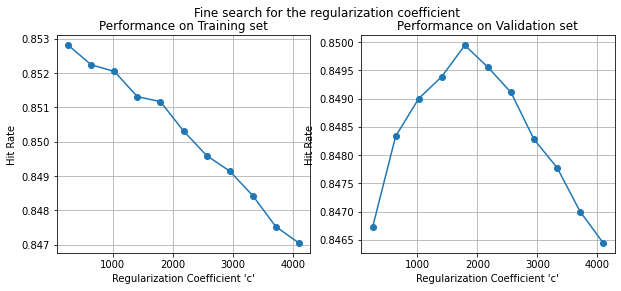

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
W = get_w(X, yy, best_c)

In [ ]:
yt_estimate = np.matmul(Xt,W)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.8573
[[ 942    0   18    5    1   19   15    5   13   22]
 [   0 1104   61   14   24   15   10   44   62   14]
 [   1    2  822   24    6    8    6   17    7    3]
 [   2    2   22  886    2   96    0    7   31   13]
 [   1    1   16    3  876   23   16   16   23   62]
 [   7    0    0   13    1  591   15    0   28    1]
 [  18    5   24   11   11   25  888    2   19    2]
 [   1    2   24   28    1   20    0  889   17   62]
 [   7   19   42   17   11   72    8    2  754    9]
 [   1    0    3    9   49   23    0   46   20  821]]


**c) Indique quais são as duas classes mais desafiadoras para o classificador.**

As duas classes mais desafiadoras par ao classificador são a 6 e a 8, pois possuem a maior taxa de erro/falso negativo.

In [ ]:
# condition positive (P) per class
P = np.zeros(10, dtype=int)

# condition negative (N) per class
N = np.zeros(10, dtype=int)

# true positive (TP) per class
TP = np.zeros(10, dtype=int)

# true negative (TN) per class
TN = np.zeros(10, dtype=int)

# false positive (FP) per class *******
FP = np.zeros(10, dtype=int)

# false negative (FN) per class *******
FN = np.zeros(10, dtype=int)

sum_along_lines = np.sum(confusion_matrix, 1)
sum_along_columns = np.sum(confusion_matrix, 0)

for sample in yyt:
    real_class = get_class_from_sample(sample)

    # P
    P[real_class-1] += 1

    # N
    for i in range(10):
        if i+1 != real_class:
            N[i] += 1

for i in range(10):
    # TP
    TP[i-1] = confusion_matrix[i-1][i-1]

    # TN
    for j in range(10):
        if (j != i):
            TN[i-1] += confusion_matrix[j-1][j-1]

    # FP
    FP[i-1] = sum_along_lines[i-1] - confusion_matrix[i-1][i-1]
    FN[i-1] = sum_along_columns[i-1] - confusion_matrix[i-1][i-1]


# sensitivity, recall, hit rate, or true positive rate (TPR) per class
TPR = TP/P

# specificity, selectivity or true negative rate (TNR) per class
TNR = TN/N

# precision or positive predictive value (PPV) per class
PPV = TP / (TP + FP)

# negative predictive value (NPV) per class
NPV = TN / (TN + FN)

# miss rate or false negative rate (FNR) per class
FNR = FN / P

print("P:", P)
print("N:", N)
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
print("TPR:", TPR)
print("TNR:", TNR)
print("PPV:", PPV)
print("NPV:", NPV)
print("FNR:", FNR)

P: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
N: [ 9020  8865  8968  8990  9018  9108  9042  8972  9026 10000]
TP: [ 942 1104  822  886  876  591  888  889  754  821]
TN: [7631 7469 7751 7687 7697 7982 7685 7684 7819 7752]
FP: [ 98 244  74 175 161  65 117 155 187 151]
FN: [ 38  31 210 124 106 301  70 139 220 188]
TPR: [0.96122449 0.97268722 0.79651163 0.87722772 0.89205703 0.66255605
 0.92693111 0.86478599 0.77412731 0.81367691]
TNR: [0.84600887 0.84252679 0.86429527 0.85506118 0.85351519 0.87637242
 0.84992258 0.85644226 0.8662752  0.7752    ]
PPV: [0.90576923 0.8189911  0.91741071 0.83506126 0.84474446 0.90091463
 0.88358209 0.85153257 0.80127524 0.84465021]
NPV: [0.99504499 0.99586667 0.9736214  0.98412495 0.98641548 0.96366051
 0.99097357 0.98223188 0.97263341 0.97632242]
FNR: [0.03877551 0.02731278 0.20348837 0.12277228 0.10794297 0.33744395
 0.07306889 0.13521401 0.22587269 0.18632309]


**d) Informe o que fazem penúltima e antepenúltima células do notebook, analise os resultados de sua execução e responda: Qual é a estratégia adotada pelo classificador linear para buscar máximo desempenho?**

<p align="justify">As duas próximas células nos mostram a estratégia do classificador para definir qual imagem pertence a qual classe. O classificador realiza uma ponderação das regiões da imagem, regiões mais escuras (amarelo na primeira e vermelho na segunda) são as que geram maiores saídas. Podemos observar, na primeira imagem, que a classe 6 tem uma região com coloração amarela mais forte na parte superior ao contrário da classe 7 que possui uma coloração mais forte na parte inferior, ou seja essas são as áreas que claramente geraram as maiores pontuações. As áreas com cores mais claras (azul na primeira, branco na segunda) correspondem aos pixels inúteis (brancos), que não nos indicam nada.
Também podemos observar que o classificador criou um modelo para cada uma das classes.</p>

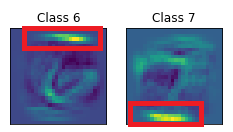

*Regiões de maior pontuação*

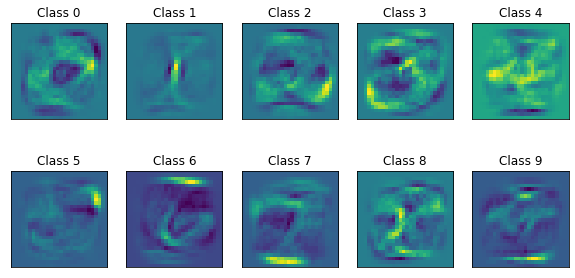

In [ ]:
# Only for the MNIST dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

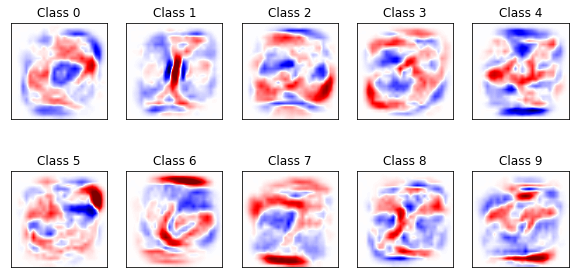

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

**e) Informe o que faz a última célula do notebook e analise os resultados.**


<p align="justify">A célula abaixo nos mostra as imagens que foram classificadas incorretamente. Imagens como a 8 e a 33 são, de certa forma, desafiadoras até mesmo para humanos classificarem, porém imagens como 45 e a 46 são facilmente identificáveis. Esses problemas de classificação ocorrem devido a estratégia adotada pelo classificador, as classes erradas geraram as maiores pontuações pois os pixels da imagem passam por regiões de maior pontuação diferentes das usuais para aqueles números, contudo vale a pena observar que na maioria dos casos a segunda maior pontuação era a classe correta, possivelmente com mais treinamento o classificador teria um desempenho melhor.</p>

Image no. 8


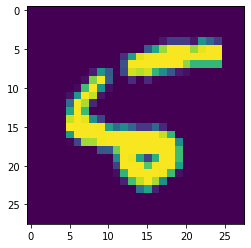

Real: 5
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.14301585  0.26444805  0.18932811 -0.33321632  0.44375775  0.4413436
  0.17679912 -0.10065735 -0.14138435  0.07893598] 

Image no. 11


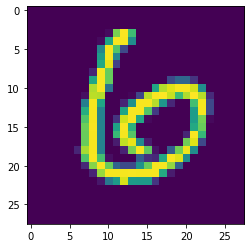

Real: 6
Predicted: 4
Rank of the correct answer: 6
Probabilities: [ 0.21630532  0.12884014  0.13191418  0.06386128  0.23004609 -0.18921367
  0.10360266 -0.10241574  0.18295355  0.04167961] 

Image no. 33


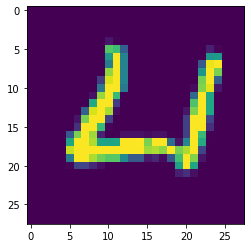

Real: 4
Predicted: 0
Rank of the correct answer: 5
Probabilities: [ 0.32427834 -0.15351048  0.16802145 -0.29888487  0.15536102  0.25696042
  0.20521523 -0.10872815  0.11154255 -0.0608698 ] 

Image no. 38


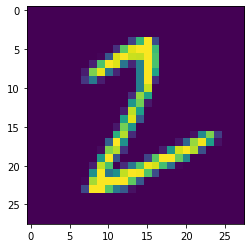

Real: 2
Predicted: 3
Rank of the correct answer: 5
Probabilities: [ 0.13335175  0.23862513  0.152036    0.25597011 -0.33220637  0.0336042
  0.1906916  -0.09833945  0.16293104 -0.11513437] 

Image no. 45


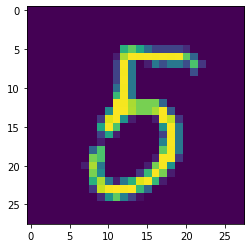

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.05178181 -0.18551198 -0.07614651  0.37656808  0.01529932  0.28600659
  0.14368335 -0.15179775  0.22080554 -0.0286496 ] 

Image no. 46


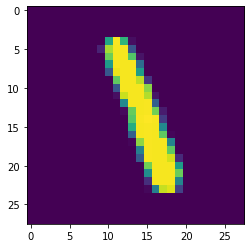

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [-0.2775314   0.29331271  0.14182431  0.32832197  0.06078114  0.18069803
  0.06940529  0.04979789  0.00777219  0.07406594] 

Image no. 63


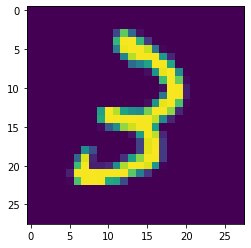

Real: 3
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.02566519  0.01607808  0.38771907  0.18812109  0.01032917 -0.02248798
 -0.02977669 -0.1361165   0.11790464  0.27139661] 

Image no. 66


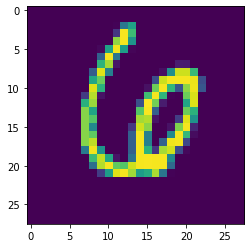

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [ 0.19613408  0.24067294  0.12423517  0.11796279  0.19615996 -0.11373716
  0.18973189  0.12602144 -0.07123441 -0.14364152] 

Image no. 77


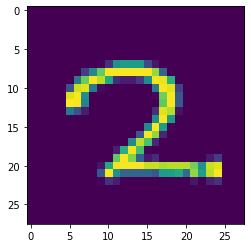

Real: 2
Predicted: 7
Rank of the correct answer: 2
Probabilities: [-0.06189308  0.02197614  0.35268027 -0.22550443  0.05359755  0.05616592
  0.06185321  0.3893948  -0.08306891  0.07040868] 

Image no. 80


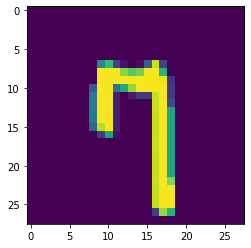

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.09835184 -0.14801056 -0.02047842  0.05706428  0.10738938  0.09479574
 -0.00097538  0.42901511 -0.18025191  0.48063272] 

Image no. 92


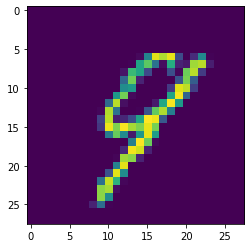

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.034669    0.01838227  0.05912786 -0.03387661  0.19422492  0.00355516
  0.02109438  0.05143884  0.1300588   0.16364224] 

Image no. 97


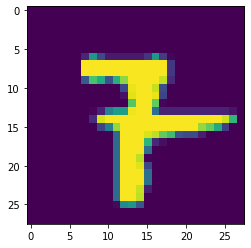

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.0658983   0.50477938 -0.136555    0.20634772  0.18191965  0.05156377
  0.24725966  0.39532214 -0.04438259  0.02528316] 

Image no. 111


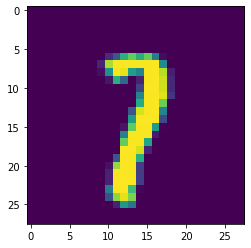

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.05944906  0.50964601  0.07974706  0.15506215 -0.09226254 -0.01798196
 -0.0294755   0.22704841  0.03317733  0.18553554] 

Image no. 124


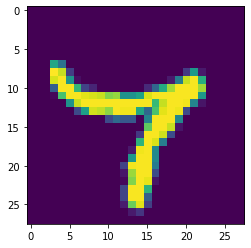

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.2230946  -0.00347626 -0.24314806  0.16457473  0.36860311 -0.0692739
  0.07034159  0.32899354  0.27165394  0.27730793] 

Image no. 149


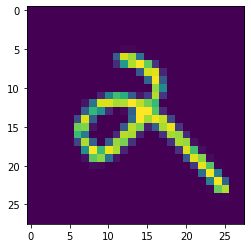

Real: 2
Predicted: 9
Rank of the correct answer: 5
Probabilities: [-0.05773629  0.17896338  0.07356027  0.04905352  0.14163578 -0.00729352
  0.01528691 -0.19570772  0.126666    0.24265304] 

Image no. 167


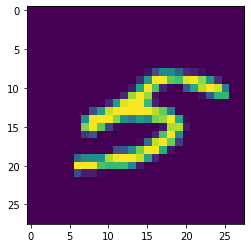

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.0090382   0.16193669  0.01338323  0.26984808  0.17408091  0.18790999
  0.00173108 -0.046027   -0.00707786 -0.04947995] 

Image no. 187


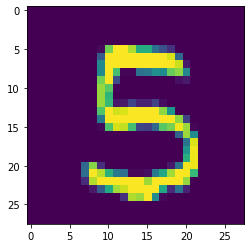

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.09548713 -0.07005961  0.10125946  0.377831   -0.0398185   0.34505982
 -0.11834413 -0.23194071  0.19827919  0.18082243] 

Image no. 195


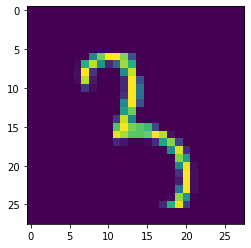

Real: 3
Predicted: 8
Rank of the correct answer: 3
Probabilities: [-0.19139796 -0.11064858  0.06008094  0.12122186  0.00336911  0.11480991
  0.03055004 -0.03095151  0.18309661  0.1224232 ] 



In [ ]:
def find_pos(item, lst): 
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z] 
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(Xt,W)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")